In [1]:
from MDP import MountainCar, CartPole
from RLAlgorithms import ESGNStepSARSA, TrueOnlineSARSALambda
import matplotlib.pyplot as plt
import numpy as np

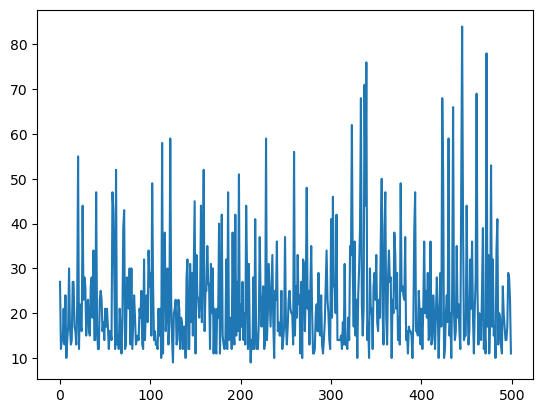

In [4]:
mc = CartPole()
# print(mc.s)
alg = ESGNStepSARSA(mc, M=10, n=2)

Gs = alg.run()

plt.clf()
plt.plot(range(len(Gs)), Gs)

lambda: 0.6


100%|██████████| 2000/2000 [00:26<00:00, 74.73it/s]


lambda: 0.7


100%|██████████| 2000/2000 [00:20<00:00, 97.81it/s]


lambda: 0.8


100%|██████████| 2000/2000 [00:59<00:00, 33.45it/s]


lambda: 0.9


100%|██████████| 2000/2000 [00:26<00:00, 76.30it/s]


lambda: 0.92


100%|██████████| 2000/2000 [00:24<00:00, 80.06it/s]


lambda: 0.95


100%|██████████| 2000/2000 [01:15<00:00, 26.46it/s]


lambda: 0.99


100%|██████████| 2000/2000 [15:29<00:00,  2.15it/s]  


lambda: 0.6


100%|██████████| 2000/2000 [16:35<00:00,  2.01it/s]    


lambda: 0.7


100%|██████████| 2000/2000 [01:43<00:00, 19.38it/s]


lambda: 0.8


100%|██████████| 2000/2000 [01:47<00:00, 18.68it/s]


lambda: 0.9


100%|██████████| 2000/2000 [00:57<00:00, 34.59it/s]


lambda: 0.92


100%|██████████| 2000/2000 [00:26<00:00, 74.61it/s]


lambda: 0.95


100%|██████████| 2000/2000 [00:27<00:00, 72.37it/s] 


lambda: 0.99


100%|██████████| 2000/2000 [00:14<00:00, 136.88it/s]


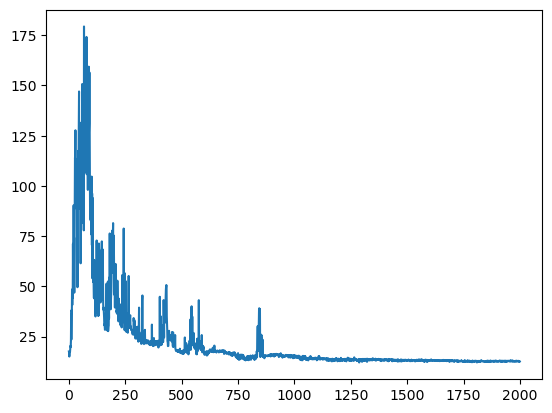

In [3]:
num_trials = 20
cp = CartPole()


for approach in ['epsilon-greedy', 'softmax']:
    for t in [0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.95, 0.99]:
        print('lambda:',t)
        alg = TrueOnlineSARSALambda(cp, M=10, tdr=t, approach=approach)
        Gs = np.zeros(alg.num_episodes)

        for _ in range(num_trials):
            alg.reset()
            Gs += np.array(alg.run())

        Gs /= num_trials

        plt.clf()
        plt.plot(range(len(Gs)), Gs)
        plt.savefig(f'experiments/SARSALambda-CartPole-Lambda-{t}-{approach}.png', facecolor='white')

alpha: 0.005


100%|██████████| 2000/2000 [02:05<00:00, 15.97it/s]


alpha: 0.0001


100%|██████████| 2000/2000 [00:26<00:00, 74.84it/s]


alpha: 5e-05


100%|██████████| 2000/2000 [00:35<00:00, 56.37it/s]


alpha: 1e-05


100%|██████████| 2000/2000 [00:19<00:00, 104.57it/s]


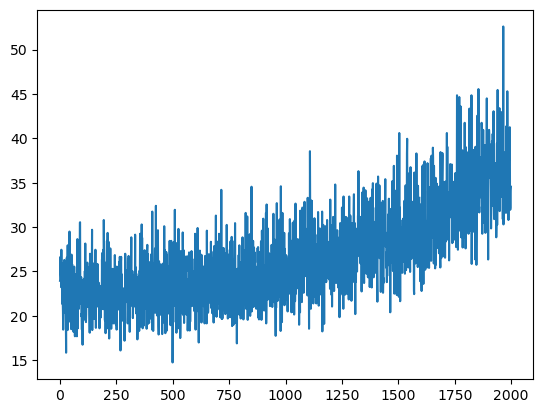

In [4]:
num_trials = 20
cp = CartPole()


for alpha in ['decay']:
    print('alpha:',alpha)
    alg = TrueOnlineSARSALambda(cp, M=10, tdr=0.6, alpha=alpha)
    Gs = np.zeros(alg.num_episodes)

    for _ in range(num_trials):
        alg.reset()
        Gs += np.array(alg.run())

    Gs /= num_trials

    plt.clf()
    plt.plot(range(len(Gs)), Gs)
    plt.savefig(f'experiments/SARSALambda/CartPole/alpha-{alpha}.png', facecolor='white')

In [3]:
mc = MountainCar()
mc.run_episode(lambda x: -1 if x[1] < 0 else 1)

-8.99998283846267